In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
session = tf.InteractiveSession()

from exoplanet import transit
from batman import _quadratic_ld

In [ ]:
T = tf.float32

c1 = tf.constant(0.5, dtype=T)
c2 = tf.constant(0.5, dtype=T)
ld = transit.QuadraticLimbDarkening(c1, c2)

nums = 2**np.arange(10, 22)
nums = 2**np.arange(19, 22)

times = []
bm_times = []
for N in nums:
    r_ref = tf.constant(0.1 + np.zeros(N), dtype=T)
    z_ref = (1 + r_ref) * tf.constant(np.linspace(0.0, 1.0, N), dtype=T)
    delta = transit.transit_depth(ld, z_ref, r_ref, n_integrate=500)
    session.run(delta)
    
    res = %timeit -o session.run(delta)
    times.append(res.best)
    
    args = [z_ref.eval(), 0.1, ld.c1.eval(), ld.c2.eval(), 1]
    res = %timeit -o  _quadratic_ld._quadratic_ld(*args)
    bm_times.append(res.best)

    print(N, times[-1], bm_times[-1])

1000 loops, best of 3: 346 µs per loop


In [ ]:
plt.loglog(nums, times, ".-")
plt.loglog(nums, bm_times, ".-")

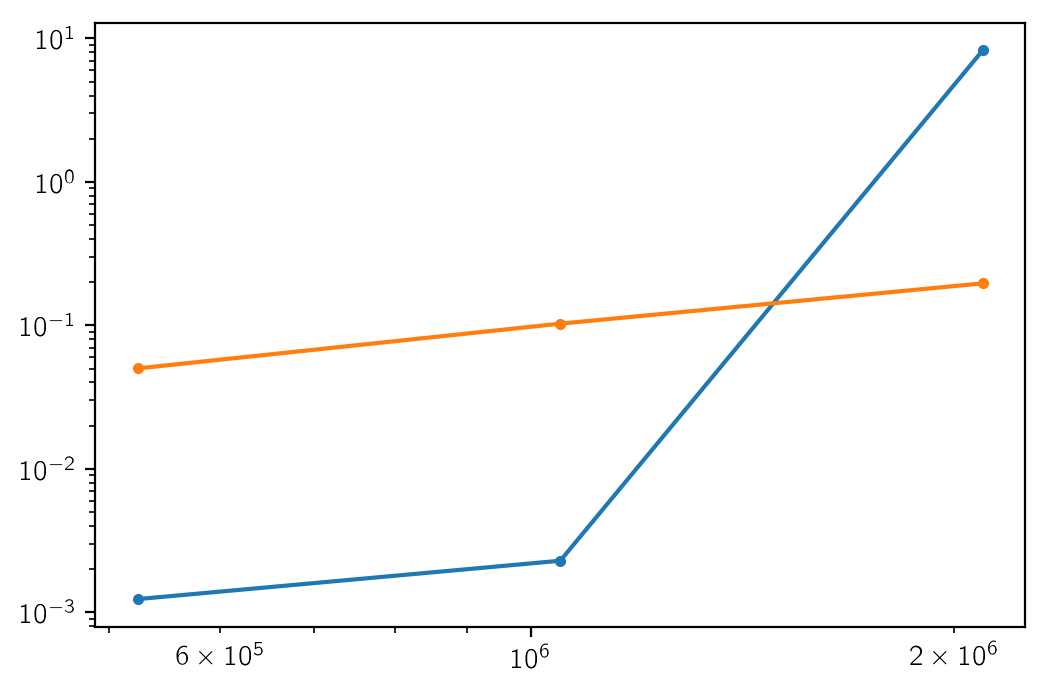

In [7]:
plt.loglog(nums, times, ".-")
plt.loglog(nums, bm_times, ".-")